<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

# 聚合：最大值，最小值以及其他

# Aggregations: Min, Max, and Everything In Between

当面对大规模数据时，第一步通常是对数据进行汇总统计。也许最常见的汇总数据就是均值和标准差，它们允许你了解数据中那些"典型"的数值。当然，还有其他一些非常有用的聚合数据（比如求和，求积，中位数，最小值，最大值，百分位等等）。

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy 内建了运算速度超快的聚合函数，我们在这里展示其中的一部分。

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## 对数组求和

## Summing the Values in an Array

先举个简单的例子：对数组中所有数据求和。Python 的 ``sum`` 就能做到：

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [2]:
import numpy as np

In [3]:
L = np.random.random(100)
sum(L)

46.766695264655077

语法和 NumPy 的 ``sum`` 是类似的，当然运行的结果也是一样的：

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [4]:
np.sum(L)

46.766695264655056

但是因为 NumPy 在编译的代码中执行操作，所以它的计算版本更快：

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [5]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 72.4 ms per loop
1000 loops, best of 3: 374 µs per loop


注意，``sum`` 和 ``np.sum`` 看似一样，但它们是两个不一样的函数。尤其是在可选参数上有很大的区别，并且 ``np.sum`` 可以处理多维数组，后面我们将会看到这一点。

Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## 最大值和最小值

## Minimum and Maximum

同样，Python 已经内置 ``min`` 和 ``max`` 函数，用于查找数组中的最小值或者最大值：

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [5]:
min(big_array), max(big_array)

(1.1717128136634614e-06, 0.9999976784968716)

NumPy 的函数类似，但是速度更快：

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(8.0834765869841618e-07, 0.99999699591106284)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 52.9 ms per loop
1000 loops, best of 3: 328 µs per loop


对于 ``min`` ``max`` ``sum`` 这样类似的聚合函数，还可以通过数组自己的方法调用：

For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

(8.0834765869841618e-07, 0.99999699591106284, 499533.7587627006)


只要允许，尽量采用 NumPy 版本的聚合函数（因为它们更快）！。

Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### 多维度聚合

### Multi dimensional aggregates

按照行或者列进行聚合也和常见。例如你有这样的一个二维数组：

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [9]:
M = np.random.random((3, 4))
print(M)

[[ 0.22051857  0.27287109  0.96337129  0.78381157]
 [ 0.24552893  0.39914065  0.70804662  0.80235189]
 [ 0.33662843  0.65632293  0.25875078  0.52569568]]


NumPy 聚合函数默认返回所有数据的聚合结果：

By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
M.sum()

6.173038432846238

聚合函数接受一个额外的参数 *axis* 用与指定沿着哪一个维度进行计算。例如我们想要按照列去找每一列的最小值就需要指定 ``axis=0``：

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [11]:
M.min(axis=0)

array([ 0.66859307,  0.03783739,  0.19544769,  0.06682827])

结果返回四个值，对应四列的最小值。类似的我们可以找到每一行的最大值：

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [12]:
M.max(axis=1)

array([ 0.8967576 ,  0.99196818,  0.6687194 ])

这个轴（axis）的使用方法可能会让人有点困惑。``axis`` 是指那个*将要被处理的维度*，而不是将要返回的维度。因此指定 ``axis=0`` 意味着第一个维度是要被处理的维度：对于二维数组磊说，这意味着每一列的数据将要被聚合。

译者注：指定的 ``axis`` 最终会被变成 ``1``，例如这里的一个 3x4 的数组，如果指定 ``axis=0`` 那么第一维会变成 ``1`` 所以会成为一个 1x4 的数组，那么就是每一列做了聚合。类似地，如果 ``axis=1`` 那么数组会变成一个 3x1 的数组，那么数组就是按照行做了聚合。

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### 其他聚合函数

### Other aggregation functions

NumPy 有大量的聚合函数，我们这里不会一一介绍。并且大多数聚合函数都能够处理 ``NaN`` 数值的情况：计算过程中会忽略这些 ``NaN`` 数据（有关 ``NaN`` 的讨论详见[处理缺失值](03.04-Missing-Values.ipynb)）。很多对于 ``NaN`` 处理的函数是在 NumPy 1.8 之后添加的，旧版本并不支持。

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

下表提供了 NumPy 中的聚合函数：

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute median of elements                    |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

我们将在后面的章节中看到这些函数。

We will see these aggregates often throughout the rest of the book.

## 示例：美国总统的平均身高是多少？

## Example: What is the Average Height of US Presidents?

NumPy 中的聚合函数对于汇总数据来说非常有用。举一个简单的例子，让我们考虑所有美国总统的高度。此数据保存在 president_heights.csv，这是一个用逗号分隔的数据格式：

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [11]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


我们会使用将在[第三章](03.00-Introduction-to-Pandas.ipynb)中介绍的 Pandas 对数据进行处理（注意，身高以厘米为单位）。

We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [12]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


(身高以厘米为单位).
有了这个数据，我们就可以计算各种各样的统计值了:

(Note that the heights are measured in centimeters).
Now that we have this data array, we can compute a variety of summary statistics:

In [15]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


可以看到，聚合函数把一个数组汇总成为了单个数值并为我们提供了数据的某些统计信息。接下来，我们还可以计算数据的百分位：

Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [16]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


美国总统身高的中位数是 182cm，差不多是 6 英尺不到。

We see that the median height of US presidents is 182 cm, or just shy of six feet.

有时候把数据做个可视化表示可能更清楚。我们可以用 Matplotlib （在[第四章](04.00-Introduction-To-Matplotlib.ipynb)介绍）：

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

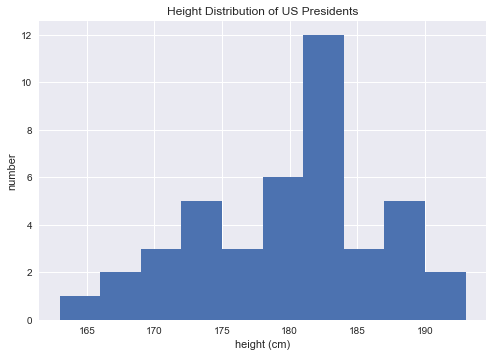

In [15]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

这些聚合函数是进行探索性数据分析最基础的工具，我们将在本书后面的章节中更深入地探讨。

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >